In [1]:
import numpy as np
import seaborn as sns
import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib import cm, colormaps
from scipy.spatial import ConvexHull

In [2]:
from voronoi_utils import *

In [ ]:
# cd ExtendedCorrelationFunctions


In [3]:
xMin= 0
xMax=1000
yMin=0
yMax=1000

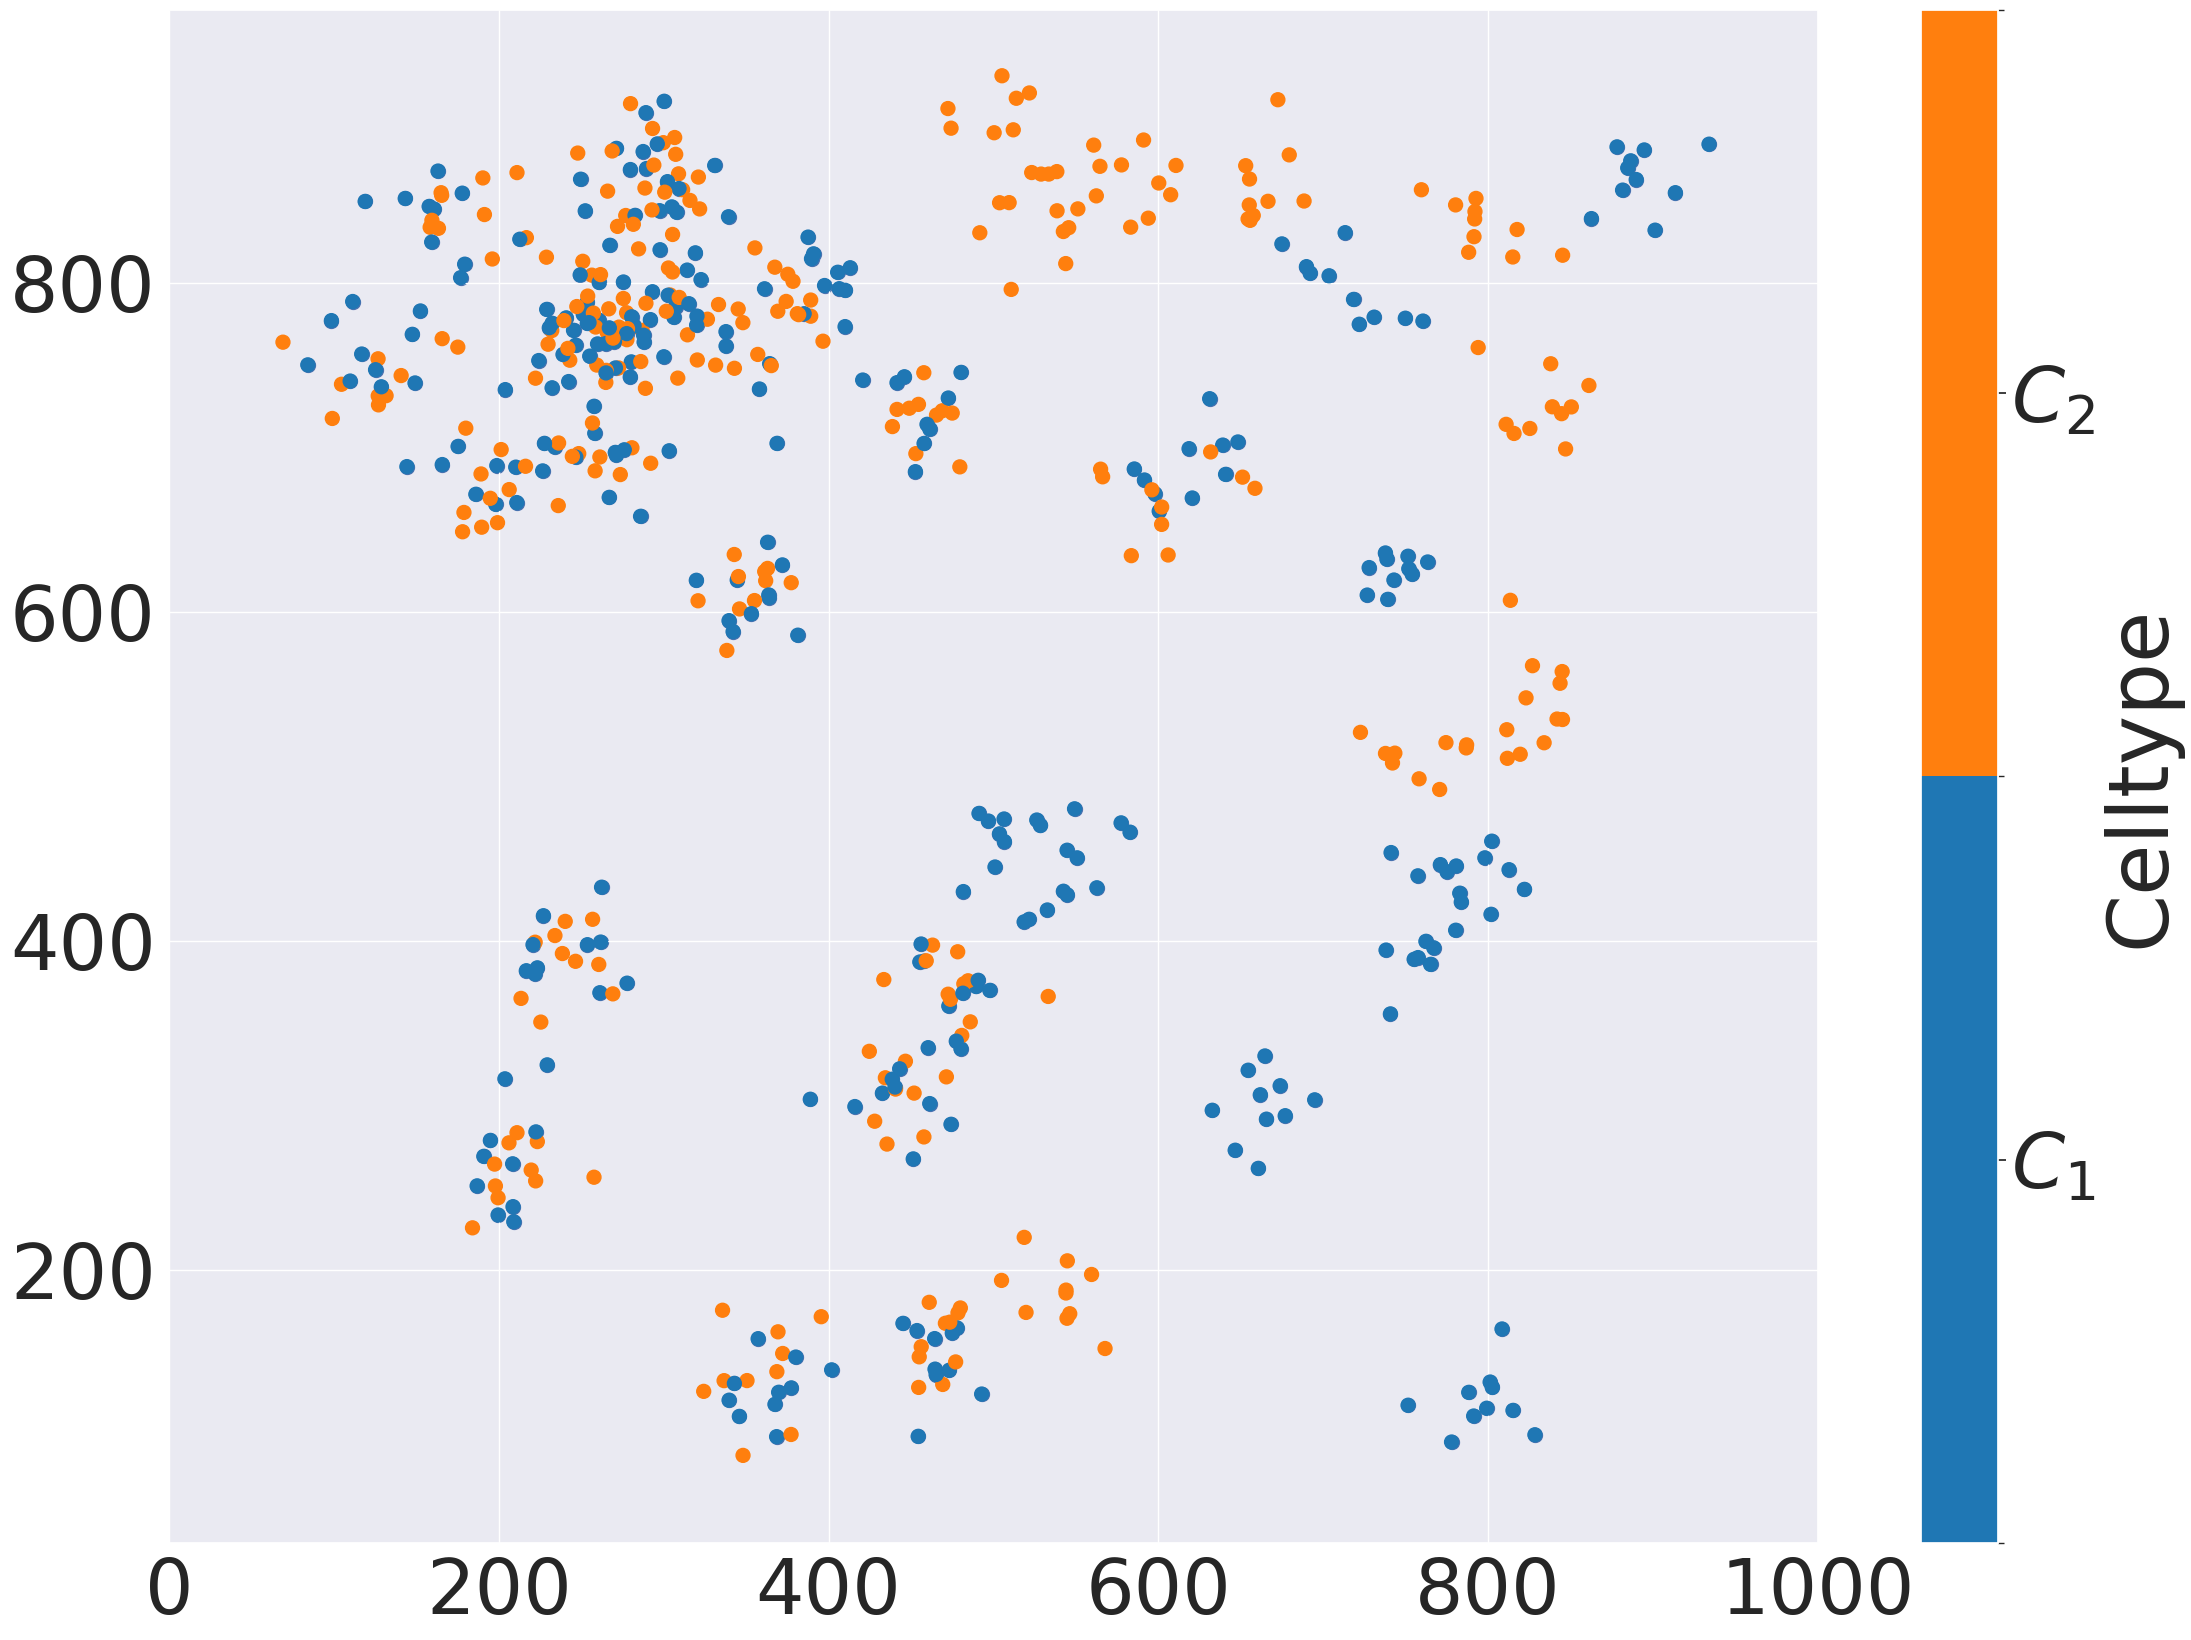

In [4]:
from SyntheticDataset1_functions import generate_synthetic_dataset1, cross_pcf_synthetic_dataset1
pc, c1mask = generate_synthetic_dataset1()
plt.savefig("figures/synthetic_d1.png")

points= pc.points

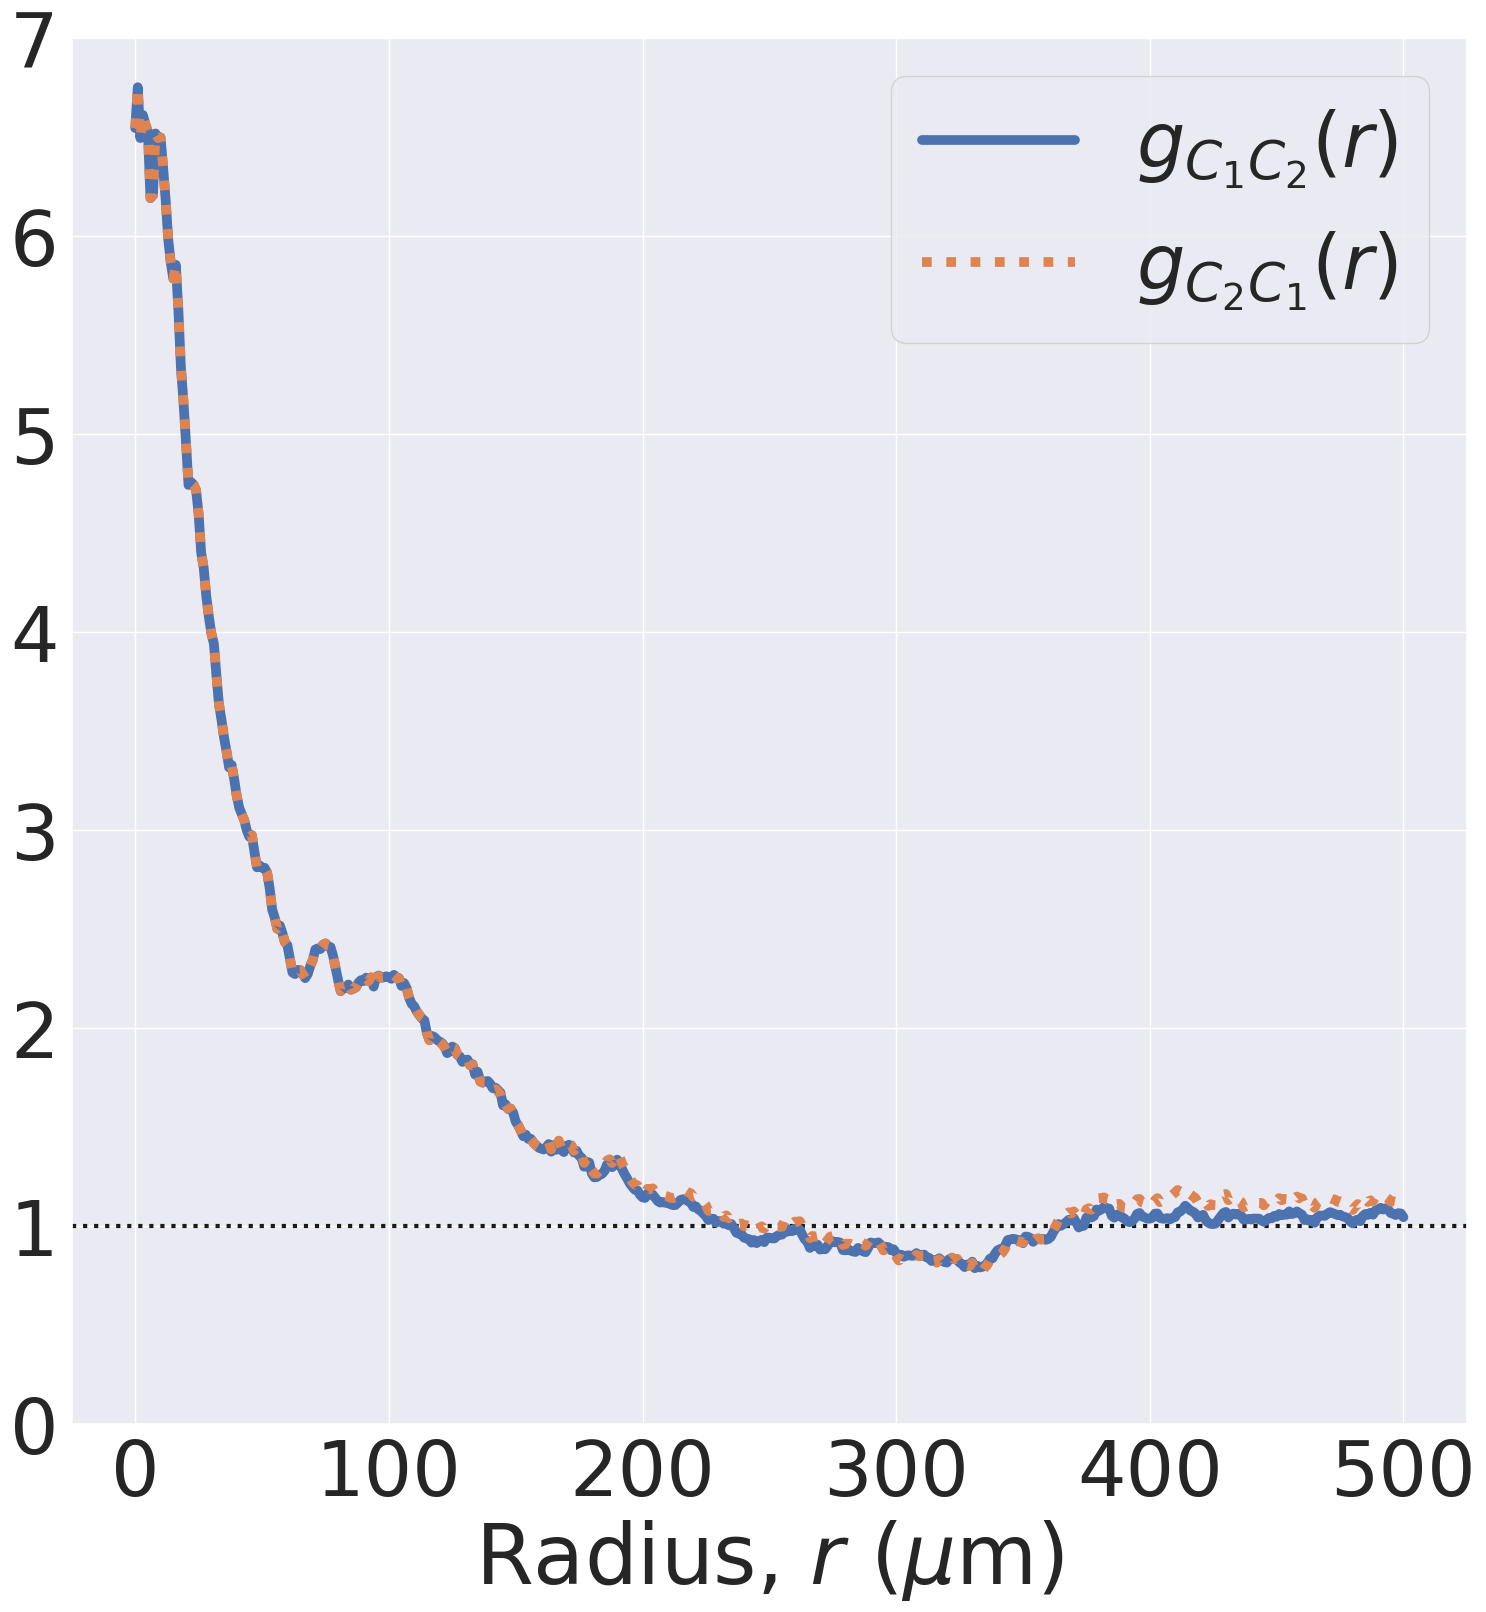

In [5]:
cross_pcf_synthetic_dataset1(pc)
plt.savefig("figures/cross_pcf_d1.png")


In [ ]:
# make graph of adjacency (adjacency matrix)
# make matrices of shortest path distances
# subset based on k and count

In [7]:
# CROSS Voronoi pcf

def compute_u_s_cross(points, c1mask, c2mask=None):

    vor = Voronoi_cells(points, show=False)
    adj = make_adj_matrix(vor)
    shortest_path_dists = compute_shortest_path_dist(adj)
    # visualize_voronoi_source(shortest_path_dists, vor, source = 0)

    u_s_cross = {}
    # u_s_21 = {}
    for k in range(int(np.max(shortest_path_dists))):
        if k >= 1:
            u_s_cross[k] = avg_k_neighbors_cross(shortest_path_dists, k, c1mask, c2mask)
    #         u_s_21[k] = avg_k_neighbors_cross(shortest_path_dists, k, c1mask)

    return u_s_cross

# u_s_cross= compute_u_s_cross(points, c1mask)


In [8]:
# normal voronoi pcf

# def compute_u_s(points):

#     vor = Voronoi_cells(points, show=False)
#     adj = make_adj_matrix(vor)
#     shortest_path_dists = compute_shortest_path_dist(adj)

#     u_s = {}
#     for k in range(int(np.max(shortest_path_dists))):
#         u_s[k] = avg_k_neighbors(shortest_path_dists, k)

#     return u_s

u_s = compute_u_s(points)

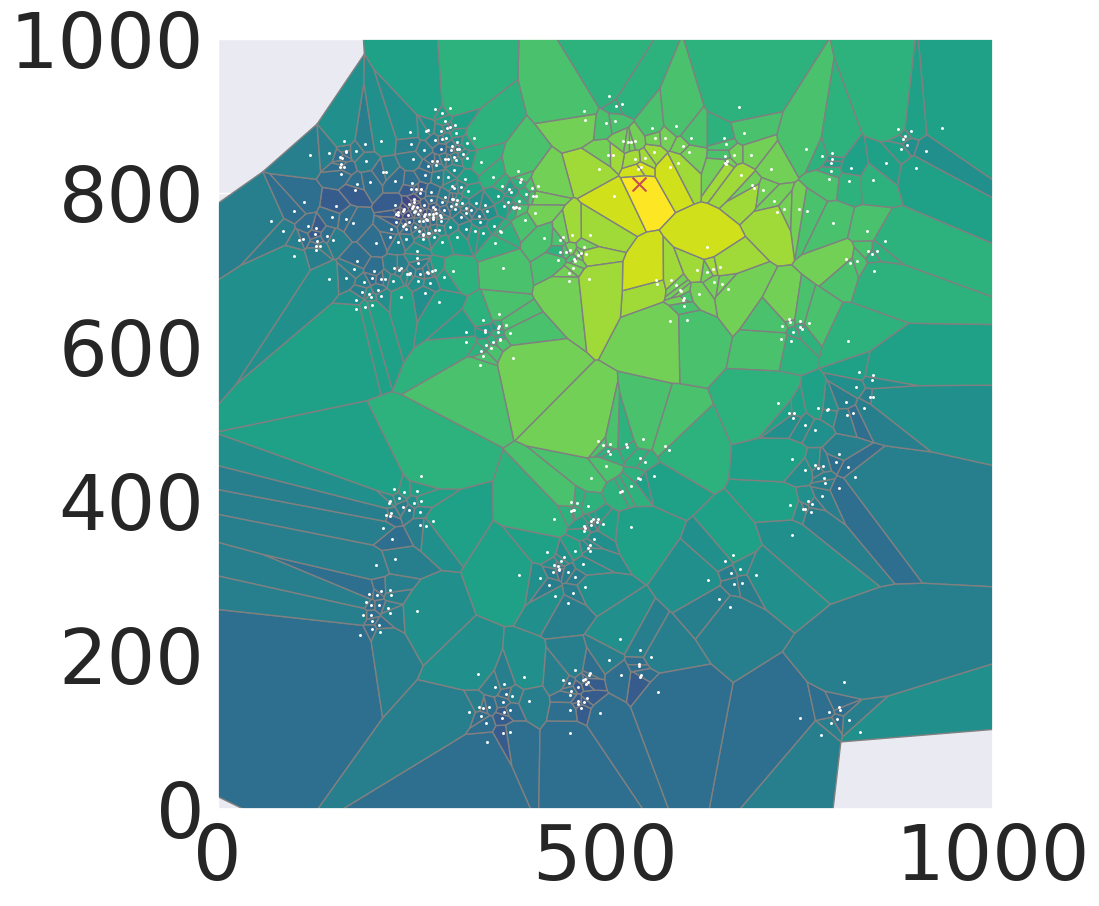

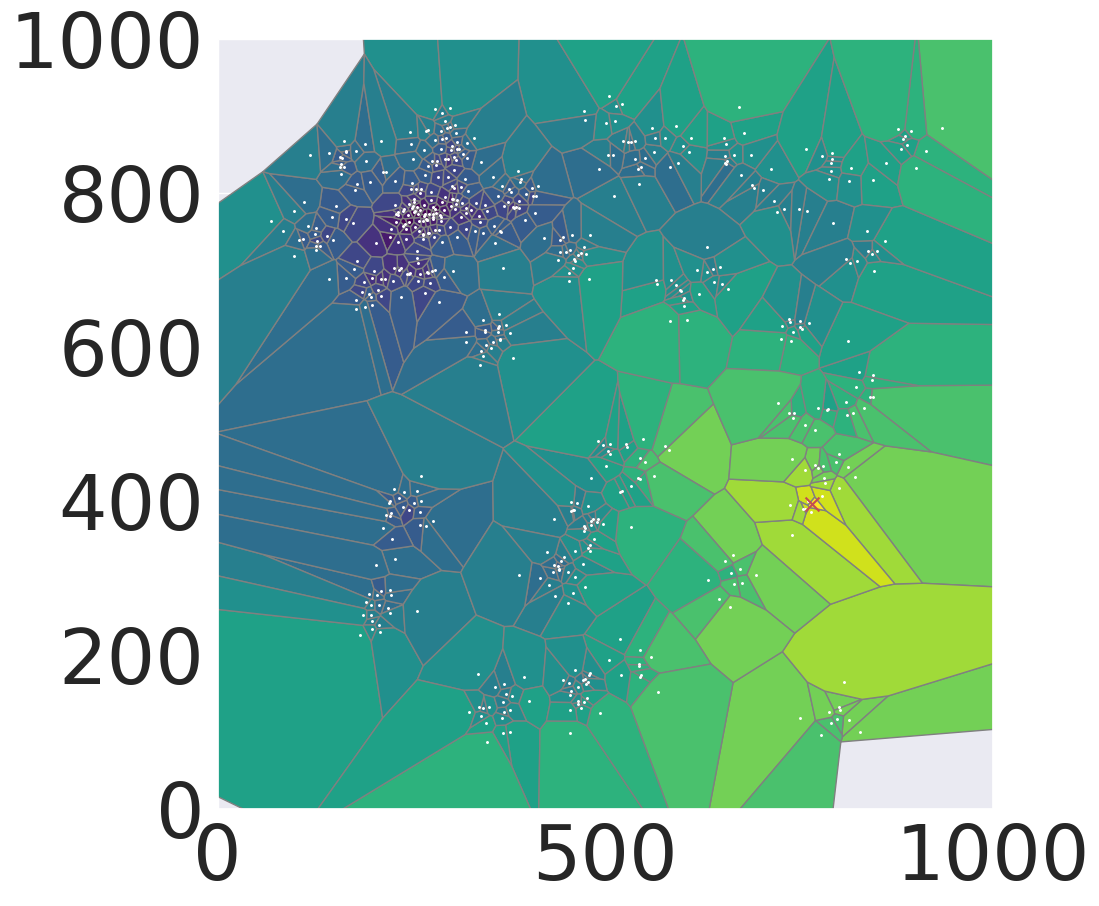

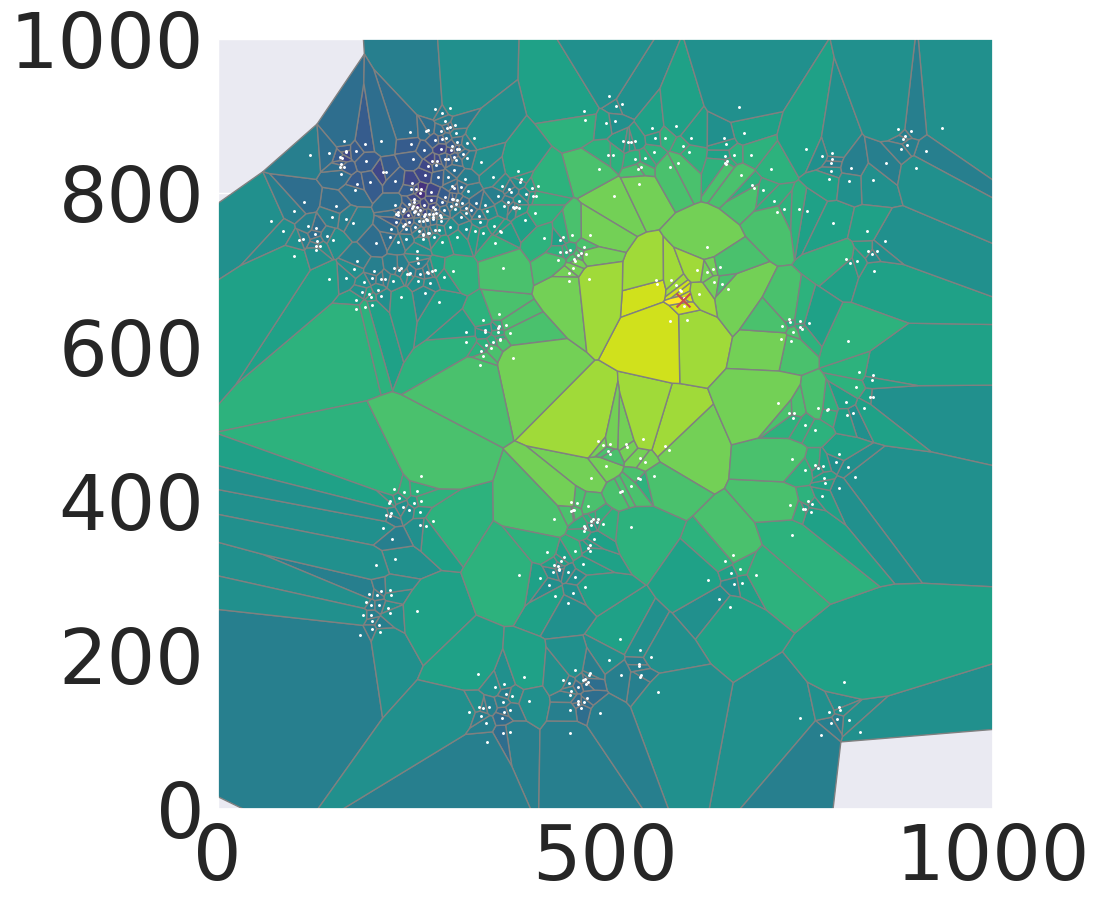

In [9]:
# some visualizations

vor = Voronoi_cells(points, show=False)
adj = make_adj_matrix(vor)
shortest_path_dists = compute_shortest_path_dist(adj)

for source in [104, 299, 400]:
    visualize_voronoi_source(shortest_path_dists, vor, xMin, xMax, yMin, yMax, source = source)
    plt.savefig("figures/source_" + str(source) + ".png")


# Poisson process

In [19]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

# plt.rcParams.update({'font.size': 10})


In [11]:
areaTotal, xDelta, yDelta = calculate_area_rectangle(xMin, xMax, yMin, yMax)
density = points.shape[0]/areaTotal

In [12]:
# normal Voronoi PCF

# def compute_u_id(density, xMin, xMax, yMin, yMax, N=100):

#     dict_all_iters = run_poisson(density, xMin, xMax, yMin, yMax, N=N)
# #     hist_k(dict_all_iters)
#     u_id = avg_k(dict_all_iters)
    
#     return u_id, dict_all_iters

# u_id, dict_all_iters = compute_u_id(density, xMin, xMax, yMin, yMax, N=100)
# hist_k(dict_all_iters)

In [15]:
# # cross Voronoi PCF poisson

# def compute_u_id_cross(density, xMin, xMax, yMin, yMax, N=100):

#     N_total = points.shape[0]
#     N_c1 = np.count_nonzero(c1mask)
    
#       dict_all_iters_cross = run_poisson(density, xMin, xMax, yMin, yMax, N=N, show = False)
# #     dict_all_iters_cross = run_poisson_cross(N_c1/ N_total, density, xMin, xMax, yMin, yMax, N=N, show = False)
# #     hist_k(dict_all_iters_cross)
#     u_id_cross = avg_k(dict_all_iters_cross)
    
#     return u_id_cross, dict_all_iters_cross

# u_id_cross, dict_all_iters_cross = compute_u_id_cross(density, xMin, xMax, yMin, yMax, N=10)
# # hist_k(dict_all_iters_cross)


N_total = points.shape[0]
N_c1 = np.count_nonzero(c1mask)

u_id_cross_21, dict_all_iters_cross = compute_u_id(N_c1/areaTotal, xMin, xMax, yMin, yMax, N=10)
# hist_k(dict_all_iters_cross)

In [35]:
def v_s(k, u_s, u_id):
    return u_s[k]/u_id[k]

def plot_voronoi_pcf(u_s, u_id, title = 'Voronoi PCF'):
    
    fig = plt.figure()
    max_k = min(max(u_s.keys()), max(u_id.keys()))
    min_k = max(min(u_s.keys()), min(u_id.keys()))
    ks = np.arange(min_k, max_k+1)

    vpcfs = [v_s(k, u_s, u_id) for k in ks]
    plt.plot(ks, vpcfs, '-o')
    plt.xlabel('k')
    plt.ylabel('Voronoi PCF')
    plt.title(title)
    
    return vpcfs

def plot_multiple_voronoi_pcf(u_s_list, u_id_list, legend_names, title = 'Voronoi PCF'):
    
    fig = plt.figure()
    
    vpcfs_list = []
    
    for i, u_s in enumerate(u_s_list):
        u_id = u_id_list[i]
        
        max_k = min(max(u_s.keys()), max(u_id.keys()))
        min_k = max(min(u_s.keys()), min(u_id.keys()))
        ks = np.arange(min_k, max_k+1)
        vpcfs = [v_s(k, u_s, u_id) for k in ks]
        vpcfs_list.append(vpcfs)
        
        plt.plot(ks, vpcfs, '-o', label = legend_names[i])
        plt.xlabel('k')
        plt.ylabel('Voronoi PCF')
        plt.title(title)
        plt.legend()
        
        
    return vpcfs_list


In [31]:
N_total = points.shape[0]
N_c1 = np.count_nonzero(c1mask)
N_c2 = np.count_nonzero(np.logical_not(c1mask))


u_s = compute_u_s(points)
u_s_cross_12= compute_u_s_cross(points, c1mask)

u_id, dict_all_iters = compute_u_id(density, xMin, xMax, yMin, yMax, N=100)
u_id_cross_12, dict_all_iters_cross = compute_u_id(N_c2/areaTotal, xMin, xMax, yMin, yMax, N=10)

# plt.subplots(2,3)
plot_voronoi_pcf(u_s, u_id)
plt.savefig("figures/vpcf_d1.png")

plot_voronoi_pcf(u_s_cross_12, u_id_cross_12, title = "Voronoi Cross PCF")
plt.savefig("figures/cross_vpcf_d1.png")


KeyboardInterrupt: 

# on second dataset

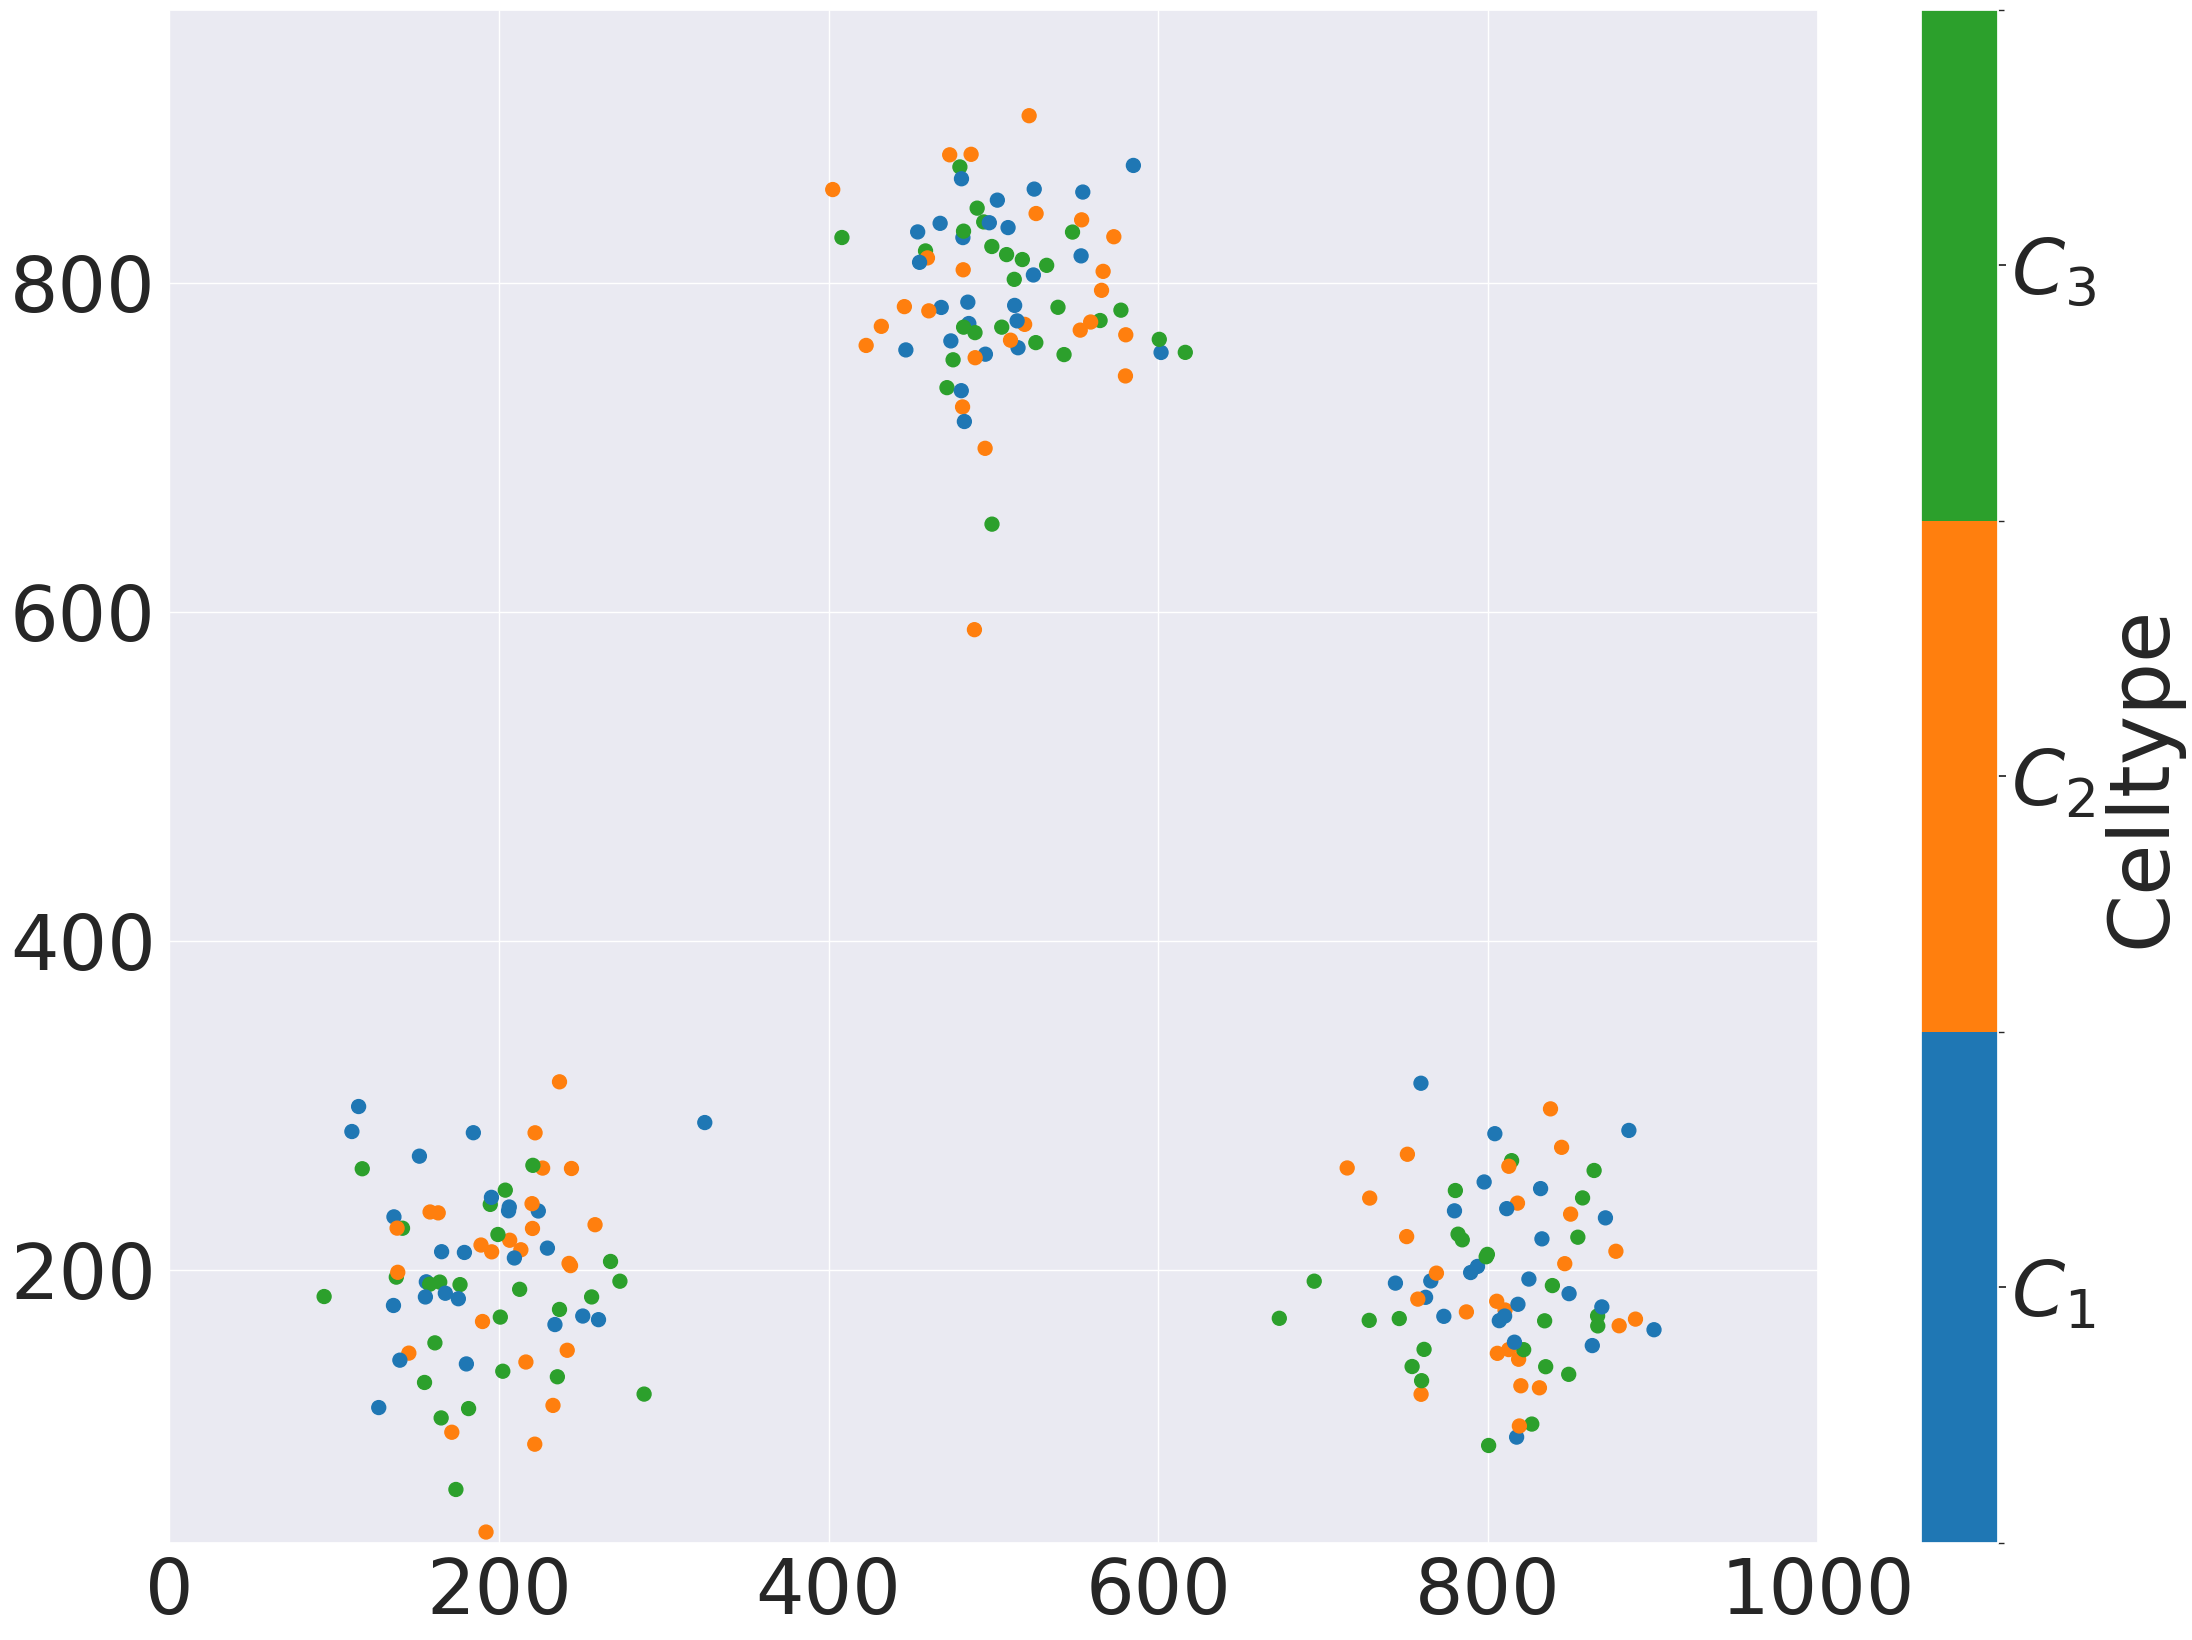

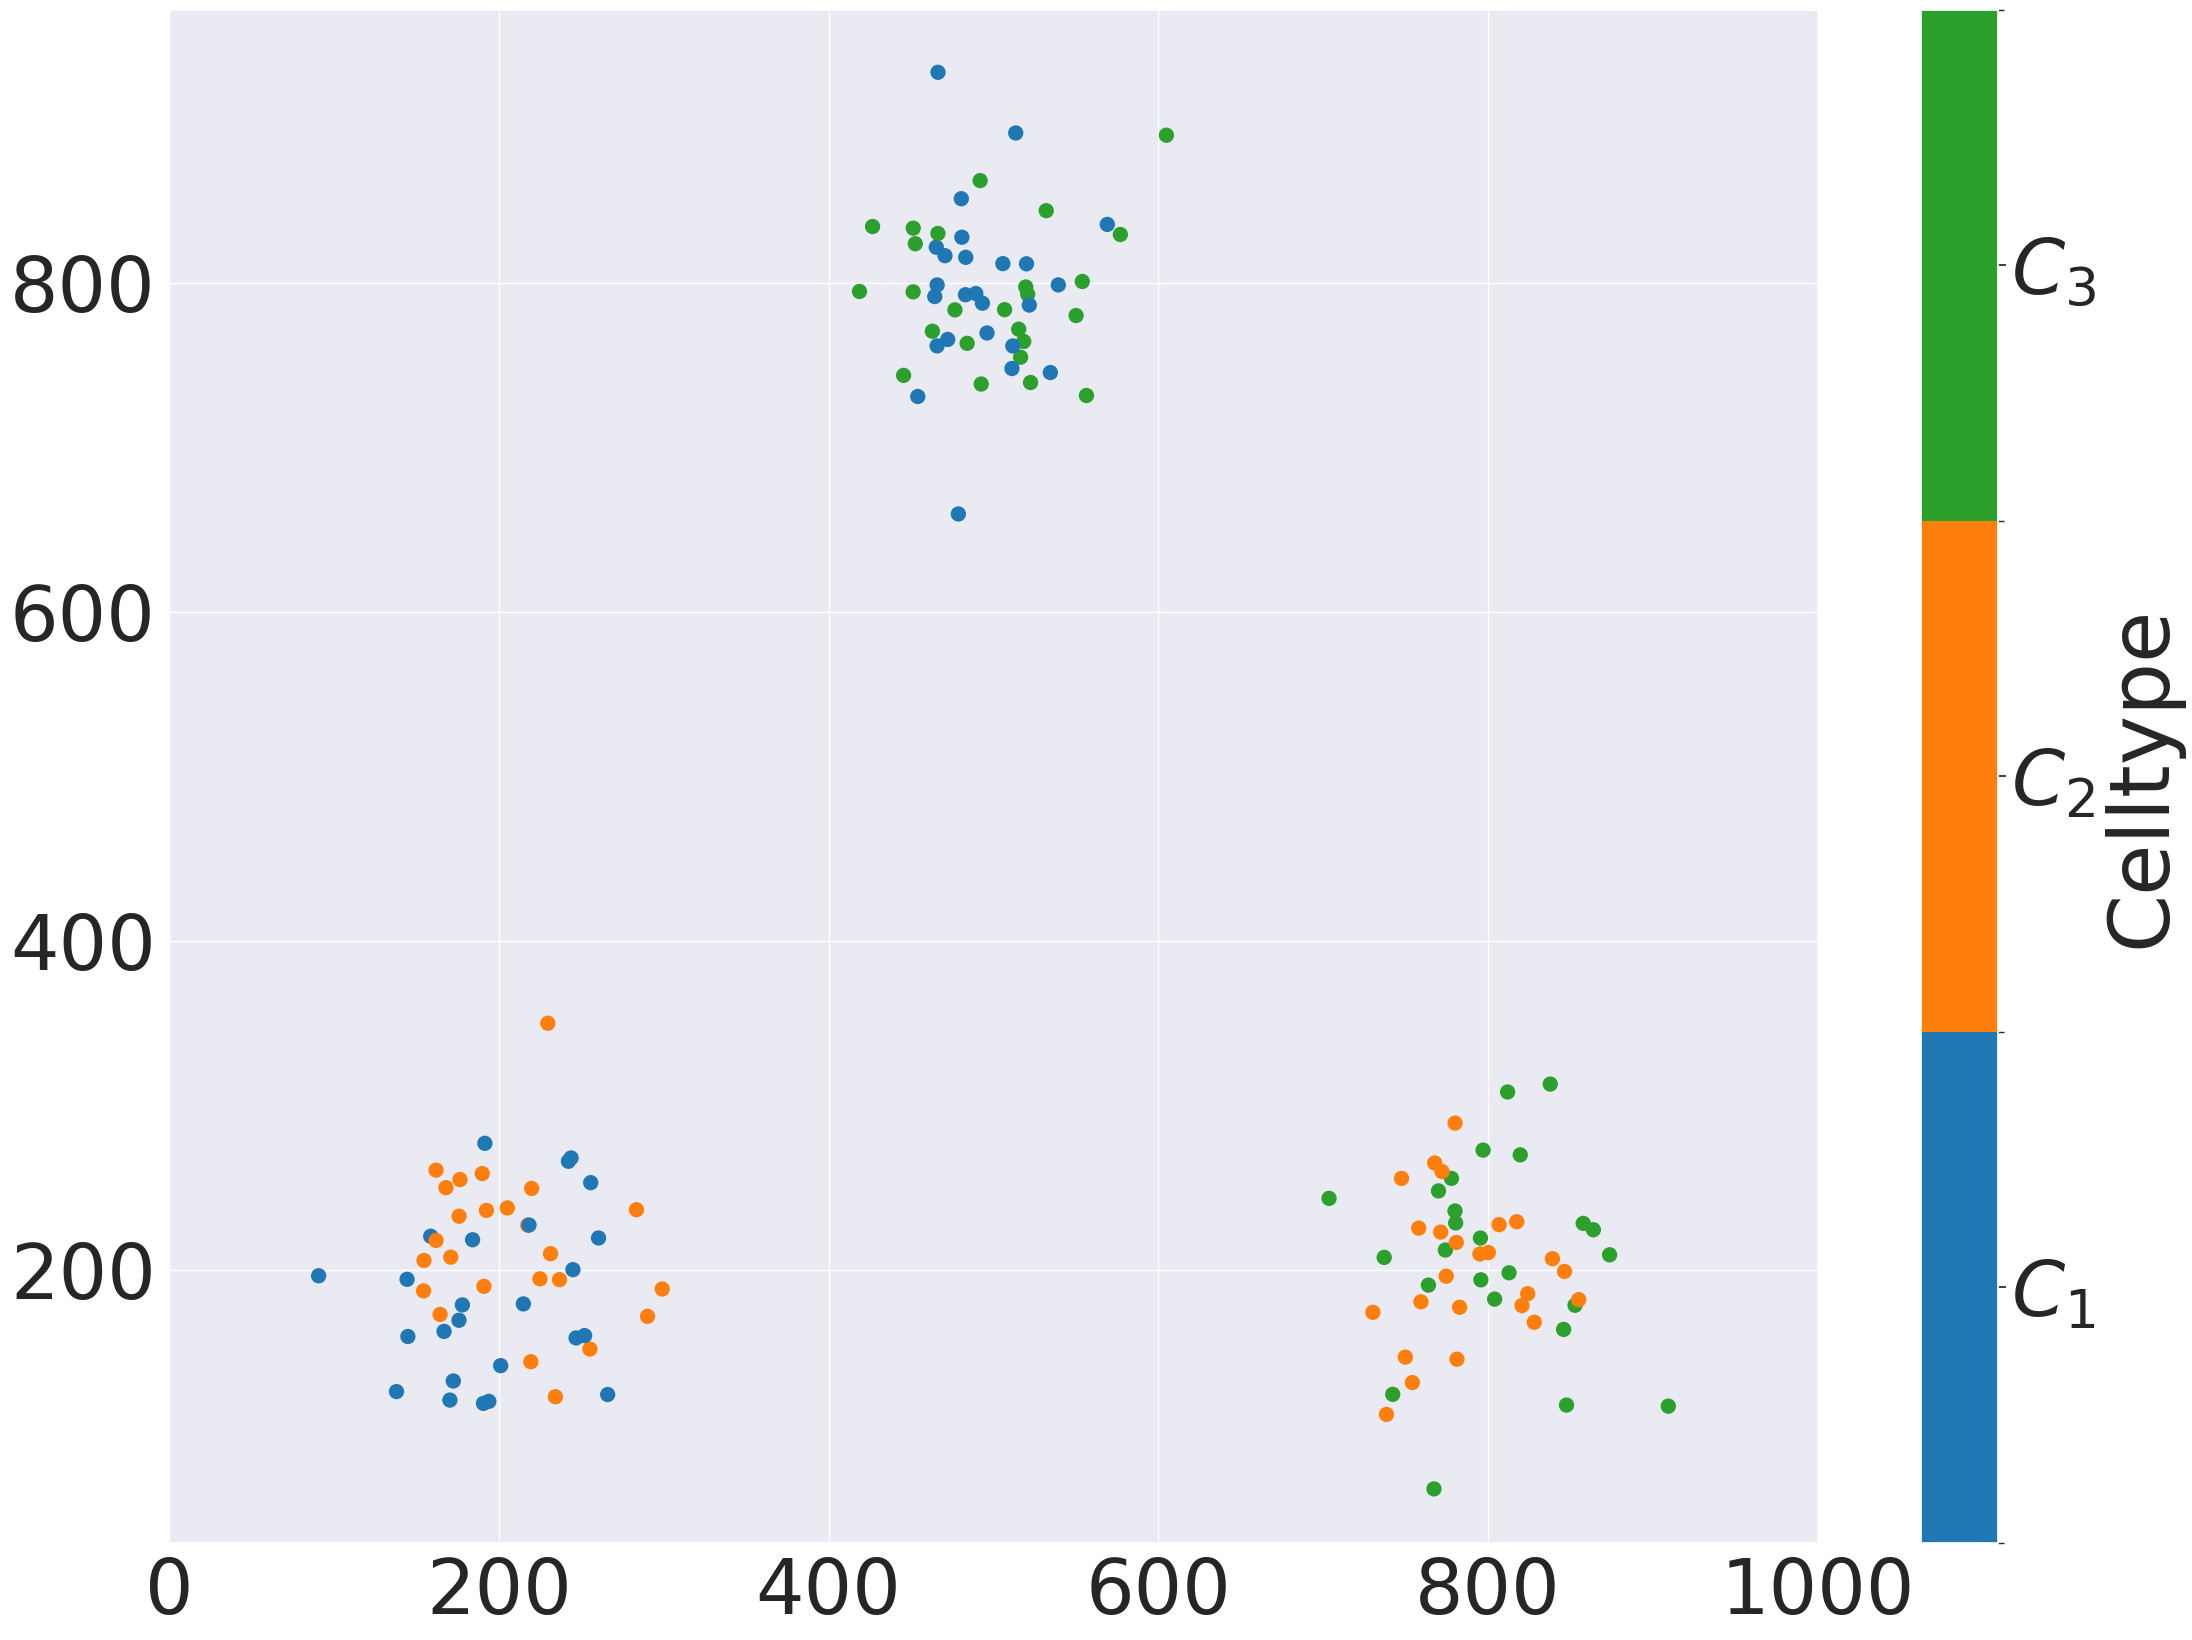

In [4]:
from SyntheticDataset2_functions import generate_synthetic_dataset2_3way,  generate_synthetic_dataset2_pairwise

pc_3wise = generate_synthetic_dataset2_3way()
plt.savefig("figures/synthetic_d2_3wise.png")

pc_pairwise = generate_synthetic_dataset2_pairwise()
plt.savefig("figures/synthetic_d2_pairwise.png")


In [40]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # fontsize of the legend labels

# plt.rcParams.update({'font.size': 10})


In [15]:
c1mask_pairwise = np.asarray(pc_pairwise.labels['Celltype']['labels']) == '$C_1$'
c2mask_pairwise = np.asarray(pc_pairwise.labels['Celltype']['labels']) == '$C_2$'
c3mask_pairwise = np.asarray(pc_pairwise.labels['Celltype']['labels']) == '$C_3$'


c1mask_3wise = np.asarray(pc_3wise.labels['Celltype']['labels']) == '$C_1$'
c2mask_3wise = np.asarray(pc_3wise.labels['Celltype']['labels']) == '$C_2$'
c3mask_3wise = np.asarray(pc_3wise.labels['Celltype']['labels']) == '$C_3$'

N_C1_pairwise = np.sum(c1mask_pairwise)
N_C2_pairwise = np.sum(c2mask_pairwise)
N_C3_pairwise = np.sum(c3mask_pairwise)
N_total_pairwise = pc_pairwise.points.shape[0]

N_C1_3wise = np.sum(c1mask_3wise)
N_C2_3wise = np.sum(c2mask_3wise)
N_C3_3wise = np.sum(c3mask_3wise)
N_total_3wise = pc_3wise.points.shape[0]


areaTotal, xDelta, yDelta = calculate_area_rectangle(xMin, xMax, yMin, yMax)

density1_pairwise = N_C1_pairwise/areaTotal
density2_pairwise = N_C2_pairwise/areaTotal
density3_pairwise = N_C3_pairwise/areaTotal

density1_3wise = N_C1_3wise/areaTotal
density2_3wise = N_C2_3wise/areaTotal
density3_3wise = N_C3_3wise/areaTotal

In [16]:
#pairwise
u_s_cross_pairwise_12 = compute_u_s_cross(pc_pairwise.points, c1mask_pairwise, c2mask_pairwise)
u_s_cross_pairwise_23 = compute_u_s_cross(pc_pairwise.points, c2mask_pairwise, c3mask_pairwise)
u_s_cross_pairwise_31 = compute_u_s_cross(pc_pairwise.points, c3mask_pairwise, c1mask_pairwise)


u_id_cross_pairwise_12, dict_iters_cross_pairwise_12 = compute_u_id(density2_pairwise, xMin, xMax, yMin, yMax, N=10)
u_id_cross_pairwise_23, dict_iters_cross_pairwise_23 = compute_u_id(density3_pairwise, xMin, xMax, yMin, yMax, N=10)
u_id_cross_pairwise_31, dict_iters_cross_pairwise_31 = compute_u_id(density1_pairwise, xMin, xMax, yMin, yMax, N=10)

#3wise
u_s_cross_3wise_12 = compute_u_s_cross(pc_3wise.points, c1mask_3wise, c2mask_3wise)
u_s_cross_3wise_23 = compute_u_s_cross(pc_3wise.points, c2mask_3wise, c3mask_3wise)
u_s_cross_3wise_31 = compute_u_s_cross(pc_3wise.points, c3mask_3wise, c1mask_3wise)

u_id_cross_3wise_12, dict_iters_cross_3wise_12 = compute_u_id(density2_3wise, xMin, xMax, yMin, yMax, N=10)
u_id_cross_3wise_23, dict_iters_cross_3wise_23 = compute_u_id(density3_3wise, xMin, xMax, yMin, yMax, N=10)
u_id_cross_3wise_31, dict_iters_cross_3wise_31 = compute_u_id(density1_3wise, xMin, xMax, yMin, yMax, N=10)


u_id, dict_iters = compute_u_id(density, xMin, xMax, yMin, yMax, N=10)
u_s_pairwise = compute_u_s(pc_pairwise.points)
u_s_3wise = compute_u_s(pc_3wise.points)

/home/mila/m/myriam.lizotte/pcf/ExtendedCorrelationFunctions/voronoi_utils.py:210: RuntimeWarning: Mean of empty slice.
  avg_k = np.array(list_k).mean()
/home/mila/m/myriam.lizotte/env_pcf/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


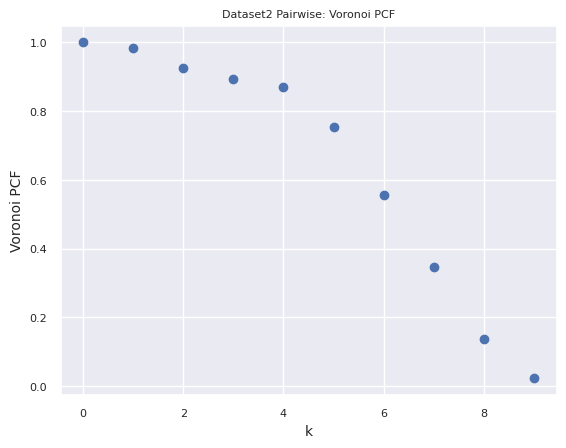

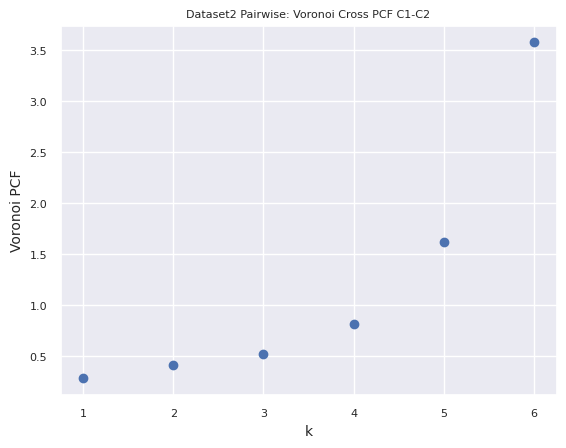

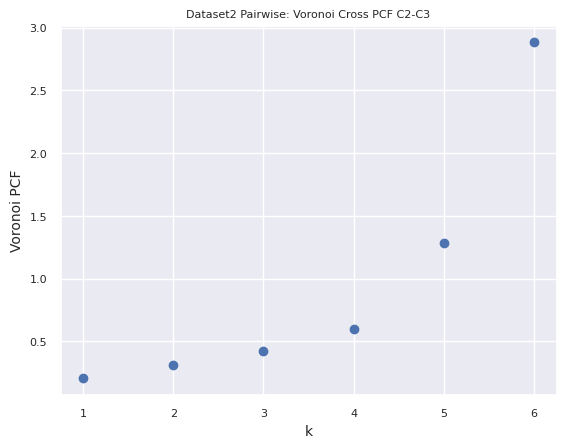

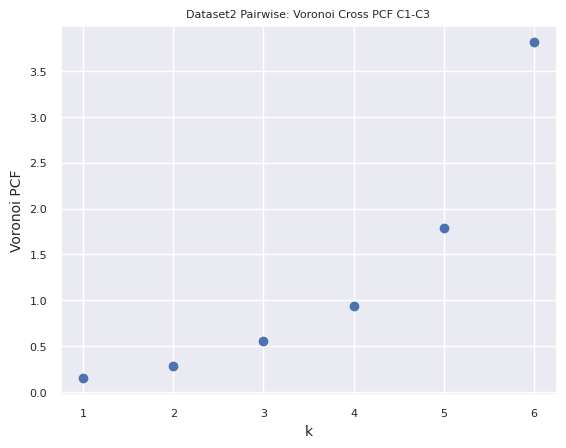

In [21]:
plot_voronoi_pcf(u_s_pairwise, u_id, title = "Dataset2 Pairwise: Voronoi PCF")
plt.savefig("figures/vpcf_d2_pairwise.png")

plot_voronoi_pcf(u_s_cross_pairwise_12, u_id_cross_pairwise_12, title = "Dataset2 Pairwise: Voronoi Cross PCF C1-C2")
plt.savefig("figures/cross_vpcf_12_d2_pairwise.png")

plot_voronoi_pcf(u_s_cross_pairwise_23, u_id_cross_pairwise_23, title = "Dataset2 Pairwise: Voronoi Cross PCF C2-C3")
plt.savefig("figures/cross_vpcf_23_d2_pairwise.png")

plot_voronoi_pcf(u_s_cross_pairwise_31, u_id_cross_pairwise_31, title = "Dataset2 Pairwise: Voronoi Cross PCF C1-C3")
plt.savefig("figures/cross_vpcf_31_d2_pairwise.png")


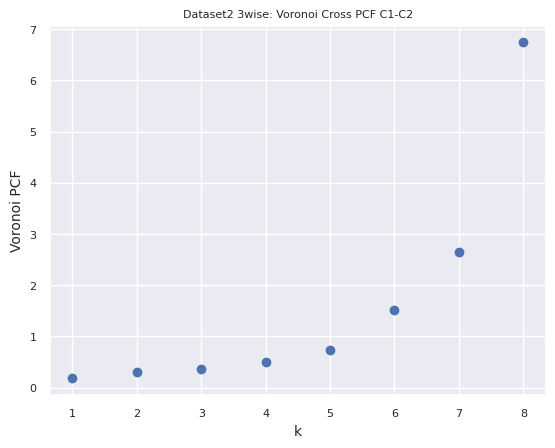

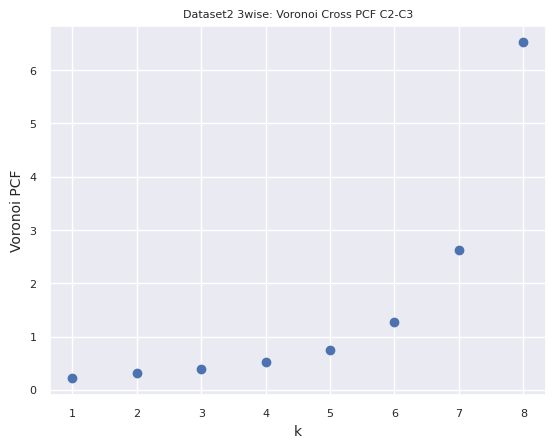

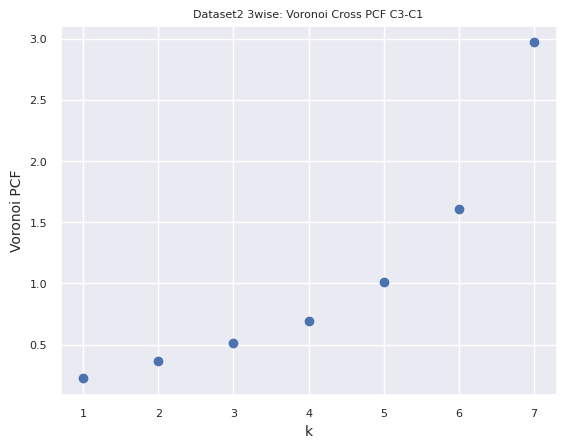

In [27]:
plot_voronoi_pcf(u_s_cross_3wise_12, u_id_cross_3wise_12, title = "Dataset2 3wise: Voronoi Cross PCF C1-C2")
plt.savefig("figures/cross_vpcf_12_d2_3wise.png")

plot_voronoi_pcf(u_s_cross_3wise_23, u_id_cross_3wise_23, title = "Dataset2 3wise: Voronoi Cross PCF C2-C3")
plt.savefig("figures/cross_vpcf_23_d2_3wise.png")

plot_voronoi_pcf(u_s_cross_3wise_31, u_id_cross_3wise_31, title = "Dataset2 3wise: Voronoi Cross PCF C3-C1")
plt.savefig("figures/cross_vpcf_31_d2_3wise.png")

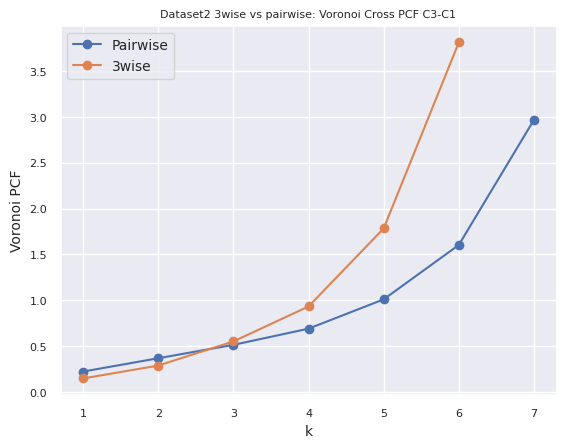

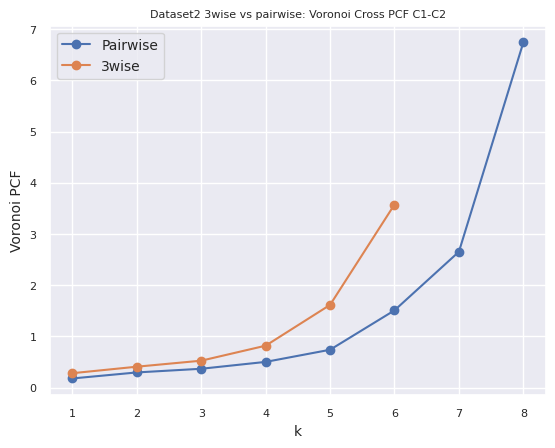

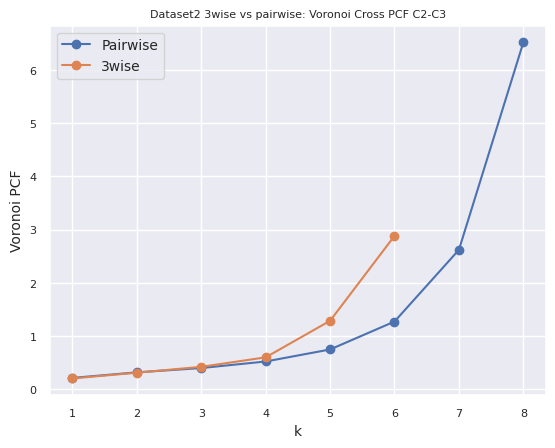

In [41]:
plot_multiple_voronoi_pcf([u_s_cross_3wise_31, u_s_cross_pairwise_31], [u_id_cross_3wise_31, u_id_cross_pairwise_31], ["Pairwise", "3wise"], title = "Dataset2 3wise vs pairwise: Voronoi Cross PCF C3-C1")
plt.savefig("figures/cross_vpcf_31_d2_pair_vs_3wise.png")

plot_multiple_voronoi_pcf([u_s_cross_3wise_12, u_s_cross_pairwise_12], [u_id_cross_3wise_12, u_id_cross_pairwise_12], ["Pairwise", "3wise"], title = "Dataset2 3wise vs pairwise: Voronoi Cross PCF C1-C2")
plt.savefig("figures/cross_vpcf_12_d2_pair_vs_3wise.png")

plot_multiple_voronoi_pcf([u_s_cross_3wise_23, u_s_cross_pairwise_23], [u_id_cross_3wise_23, u_id_cross_pairwise_23], ["Pairwise", "3wise"], title = "Dataset2 3wise vs pairwise: Voronoi Cross PCF C2-C3")
plt.savefig("figures/cross_vpcf_23_d2_pair_vs_3wise.png")